In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
input_file = 'HepG2_SDOC_represses_result.tsv'
infos = pd.read_csv(input_file, sep="\t", header=None)
infos

,0,1,2,3,4,5
0,chr1,2190000,3430000,2,0.437330,0.945192
1,chr1,3430000,5990000,2,1.050111,0.838495
2,chr1,5990000,6040000,0,0.003852,-0.270799
3,chr1,6040000,6700000,0,0.203751,-0.270799
4,chr1,6700000,7660000,0,0.222518,-0.270799
...,...,...,...,...,...,...
2637,chr9,136730000,136790000,6,0.006576,3.025970
2638,chr9,136790000,136940000,0,0.024912,-0.270799
2639,chr9,136940000,137120000,6,0.046040,2.029849
2640,chr9,137120000,137280000,9,0.032555,2.376643


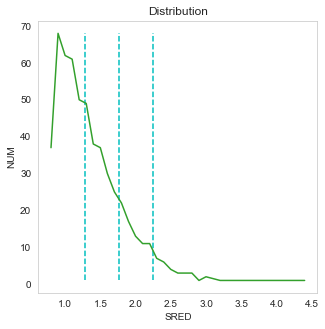

In [3]:
result = infos.loc[infos[3]>0].loc[:,5].round(1).value_counts().sort_index()
x = result.index.tolist()
y = result.values.tolist()

_sigma = infos.loc[infos[3]>0].loc[:,5].std()
_min = infos.loc[infos[3]>0].loc[:,5].min()
_thresholds = [_min+i*_sigma for i in range(1, 4)]

sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)
axes.plot(x, y, color=(51/255, 160/255, 44/255))

plt.xlabel('SRED')
plt.ylabel('NUM')
plt.title('Distribution')

for i in range(3):
    plt.vlines(_thresholds[i], result.values.min(), result.values.max(), colors = "c", linestyles = "dashed")
plt.savefig('figure_file/d.pdf')
plt.show()

In [4]:
Homo_sapiens_GRCh38_file = '/data1/lmh_data/MINE/source/Homo_sapiens.GRCh38.84.gtf'
Homo_sapiens_GRCh38 = dict()
with open(Homo_sapiens_GRCh38_file, 'r')as f:
    for line in f:
        datas = line.strip().split()
        if len(datas) < 4:
            continue
        if datas[2] != "gene":
            continue
        gene_id = datas[9].split('"')[1]
        Homo_sapiens_GRCh38[gene_id] = [datas[0], int(datas[3]), int(datas[4])]

RNA_seq_file = '/data1/lmh_data/MINE/source/HepG2/RNA_seq_rpkms.xls'
rna_infos = pd.read_excel(RNA_seq_file)
rna_infos["rna_rpkms_avg"] = rna_infos[["SS_FSU_43_none_RNAseq", "SS_FSU_44_none_RNAseq"]].mean(axis=1)
rna_infos = rna_infos.loc[rna_infos["rna_rpkms_avg"]>0]
rna_infos.insert(rna_infos.shape[1], 'Chromosome', '')
rna_infos.insert(rna_infos.shape[1], 'Gene start (bp)', 0)
rna_infos.insert(rna_infos.shape[1], 'Gene end (bp)', 0)
for index in rna_infos.index:
    if rna_infos.loc[index]["Geneid"] not in Homo_sapiens_GRCh38.keys():
        continue
    data = Homo_sapiens_GRCh38[rna_infos.loc[index]["Geneid"]]
    rna_infos.loc[index, "Chromosome"] = data[0]
    rna_infos.loc[index, "Gene start (bp)"] = data[1]
    rna_infos.loc[index, "Gene end (bp)"] = data[2]
rna_infos

,Geneid,SS_FSU_39_none_RNAseq,SS_FSU_40_none_RNAseq,SS_FSU_41_none_RNAseq,SS_FSU_42_none_RNAseq,SS_FSU_43_none_RNAseq,SS_FSU_44_none_RNAseq,SS_FSU_45_none_RNAseq,SS_FSU_46_none_RNAseq,rna_rpkms_avg,Chromosome,Gene start (bp),Gene end (bp)
2,ENSG00000278267,0.000,0.000,0.000,0.000,2.881,8.668,1.957,3.044,5.7745,1,17369,17436
9,ENSG00000238009,0.000,0.000,0.000,0.000,0.049,0.010,0.029,0.010,0.0295,1,89295,133723
12,ENSG00000268903,0.000,0.000,0.000,0.000,0.228,0.536,0.753,0.290,0.3820,1,135141,135895
13,ENSG00000269981,0.000,0.000,0.000,0.000,0.729,0.728,1.070,0.770,0.7285,1,137682,137965
15,ENSG00000241860,0.000,0.000,0.000,0.000,0.104,0.093,0.058,0.039,0.0985,1,141474,173862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60573,ENSG00000276112,0.000,0.000,0.000,0.000,3.858,3.473,0.606,1.648,3.6655,KI270733.1,124758,124937
60582,ENSG00000275104,158.948,186.994,178.420,145.462,1.756,1.696,0.544,2.084,1.7260,KI270733.1,169844,170023
60595,ENSG00000273748,0.000,0.000,0.000,0.000,0.492,0.176,0.432,0.715,0.3340,GL000219.1,54224,83311
60633,ENSG00000278384,0.000,0.000,0.000,0.000,1.111,0.911,0.853,1.156,1.0110,GL000218.1,51867,54893


In [5]:
# infos.insert(infos.shape[1], 'RNA_rpkms', 0)
for index in infos.index:
    _chr, _start, _end = infos.loc[index][0], infos.loc[index][1], infos.loc[index][2]
    temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
    temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
    result = temp[["rna_rpkms_avg"]].mean()
    infos.loc[index, "RNA_rpkms"] = math.log(result["rna_rpkms_avg"], 2)


In [6]:
colors = [
    (0, 159/255, 232/255),
    (222/255, 28/255, 38/255),
    (0, 191/255, 82/255),
    (255/255, 122/255, 23/255)
]
my_pal = {"small": colors[0], "middle": colors[1], "high": colors[2], "very_high": colors[3]}

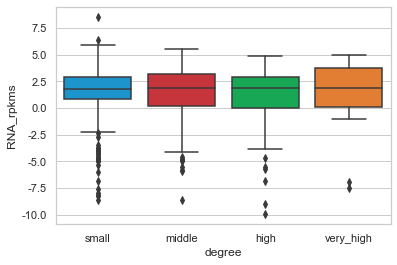

In [7]:
small = infos.loc[infos[3]>0].loc[infos[5]<_thresholds[0]].copy()
middle = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[0]].loc[infos[5]<_thresholds[1]].copy()
high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[1]].loc[infos[5]<_thresholds[2]].copy()
very_high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[2]].copy()

small["degree"] = "small"
middle["degree"] = "middle"
high["degree"] = "high"
very_high["degree"] = "very_high"

df = pd.concat([small, middle, high, very_high])

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="degree", y="RNA_rpkms", data=df, palette=my_pal)
fig = ax.get_figure()
fig.savefig('figure_file/e.pdf')

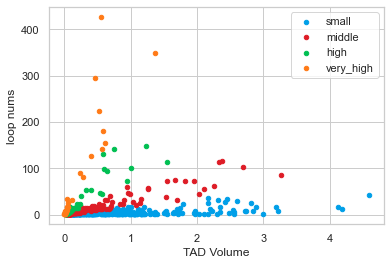

In [8]:
small["TAD Volume"] = small.loc[:, 4]
middle["TAD Volume"] = middle.loc[:, 4]
high["TAD Volume"] = high.loc[:, 4]
very_high["TAD Volume"] = very_high.loc[:, 4]

small["loop nums"] = small.loc[:, 3]
middle["loop nums"] = middle.loc[:, 3]
high["loop nums"] = high.loc[:, 3]
very_high["loop nums"] = very_high.loc[:, 3]

ax = small.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["small"], label='small')
ax = middle.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["middle"], label='middle', ax=ax)
ax = high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["high"], label='high', ax=ax)
ax = very_high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["very_high"], label='very_high', ax=ax)

fig = ax.get_figure()
fig.savefig('figure_file/f.pdf')

In [9]:
Gene_table = pd.read_csv("/data1/lmh_data/MINE/source/Gene_table_20211231.txt", sep="\t")
def find_special_tad(df):
    df = df.copy()
    df["score"] = df["TAD Volume"] * df["loop nums"]
    _special = df.sort_values(by="score", ascending=False)[:5].copy()
    for index in _special.index:
        _chr, _start, _end = _special.loc[index][0], _special.loc[index][1], _special.loc[index][2]
        temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
        temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
        geneids = temp["Geneid"].tolist()
        gene_names = set()
        for gene_id in geneids:
            gene_names = gene_names | set(Gene_table.loc[Gene_table["Gene stable ID"]==gene_id]["Gene name"].tolist())
        gene_names -= {np.nan}
        _special.loc[index, "Gene names"] = ','.join(list(gene_names))
    return _special

/home/lmh/anaconda3/envs/MMSR/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
find_special_tad(small).to_csv('represses_small(special).csv')
find_special_tad(small)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1178,chr18,36820000,45660000,43,4.586879,1.089762,-1.500218,small,4.586879,43,197.235809,"SETBP1,LINC00907,KIAA1328,PIK3C3,SETBP1-DT,KRT..."
1372,chr2,74890000,85060000,34,2.448587,1.187482,3.736622,small,2.448587,34,83.251967,"ANKRD11P1,KCMF1,SUCLG1,CTNNA2,LRRTM4,MIR5000,T..."
1307,chr2,20650000,27680000,36,2.165051,1.235194,4.517898,small,2.165051,36,77.941851,"PREB,KHK,ADGRF3,DTNB,HADHB,MPV17,DNAJC5G,CENPO..."
1170,chr18,10520000,12950000,29,2.595370,1.123733,1.633222,small,2.595370,29,75.265731,"EIF4A2P1,NPIPB1P,SPIRE1,TUBB6,PTPN2,NAPG,IMPA2..."
479,chr11,71580000,76150000,32,2.321341,1.180987,3.015876,small,2.321341,32,74.282906,"MAP6,RAB6A,CLPB,C2CD3,XRRA1,GDPD5,ARHGEF17,DGA..."


In [11]:
find_special_tad(middle).to_csv('represses_middle(special).csv')
find_special_tad(middle)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
2497,chr9,6340000,12710000,117,2.382780,1.650104,2.080837,middle,2.382780,117,278.785241,"PTPRD,GLDC,RPL35AP20,DMAC1,PRELID3BP11,KDM4C,R..."
2598,chr9,115030000,120620000,103,2.699431,1.528757,1.107018,middle,2.699431,103,278.041403,"PAPPA,ASTN2,ASTN2-AS1,TPT1P9,CDK5RAP2,TRIM32,R..."
711,chr13,51850000,72710000,85,3.264160,1.379790,1.312719,middle,3.264160,85,277.453601,"THSD1,NEK3,SUGT1-DT,RNU6-80P,SUGT1,LINC00345,C..."
1209,chr18,76710000,79380000,114,2.331886,1.644261,-1.540498,middle,2.331886,114,265.835023,"ZNF236,ATP9B,MBP,RPL26P35,ZNF236-DT"
473,chr11,64160000,69100000,63,2.259033,1.416198,3.418018,middle,2.259033,63,142.319048,"ZDHHC24,CCDC87,PPP1CA,SPTBN2,GAL3ST3,DPP3,CARN..."


In [12]:
find_special_tad(high).to_csv('represses_high(special).csv')
find_special_tad(high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
2084,chr5,175460000,179160000,148,1.230640,1.983905,4.314904,high,1.230640,148,182.134763,"ZNF346-IT1,PRMT1P1,TMED9,PHYKPL,HRH2,HIGD2A,EI..."
821,chr15,25500000,29660000,114,1.542093,1.780467,-1.684803,high,1.542093,114,175.798574,"OCA2,ATP10A,HERC2,WHAMMP2,GABRB3,GOLGA6L7,PDCD..."
2489,chr8,135450000,138710000,141,0.755872,2.194185,0.364292,high,0.755872,141,106.577923,KHDRBS3
908,chr15,85850000,88460000,100,1.004319,1.884438,-9.965784,high,1.004319,100,100.431853,NTRK3
1379,chr2,88740000,98390000,131,0.581795,2.242701,3.389207,high,0.581795,131,76.215086,"ZAP70,ITPRIPL1,ANKRD39,GPAT2P2,CNNM3-DT,GGT8P,..."


In [13]:
find_special_tad(very_high).to_csv('represses_very_high(special).csv')
find_special_tad(very_high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1961,chr5,39570000,52660000,348,1.366225,2.303637,2.418796,very_high,1.366225,348,475.446167,"RPL29P12,PRELID3BP4,PTGER4,TMEM267,SNORD72,ZNF..."
460,chr11,47850000,57270000,427,0.550515,2.967481,-0.215915,very_high,0.550515,427,235.070002,"SEPTIN7P11,OR5D17P,OR4C6,PTPRJ,TMEM230P2"
2424,chr8,48930000,52010000,294,0.466753,2.806937,-0.672696,very_high,0.466753,294,137.225457,"PXDNL,PCMTD1"
2422,chr8,42840000,47740000,223,0.516311,2.717293,0.969841,very_high,0.516311,223,115.137449,"SPIDR,HGSNAT,FNTA,POMK,AFG3L2P1,RNU1-124P,CEBP..."
2410,chr8,33480000,36830000,181,0.585778,2.505554,1.315204,very_high,0.585778,181,106.025871,"MAK16,RNF122,LSM12P1"
